## SINGLE NOTEBOOK — FULL CNN WITH ALL CONVOLUTIONS

You can paste this as-is into one notebook and run top → bottom.


### Cell 1 — Imports & Setup

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
from matplotlib.animation import PillowWriter

os.makedirs("gifs", exist_ok=True)


### Cell 2 — Load Image

In [2]:
img = Image.open("./Images/B.jpg").convert("L")
img = img.resize((64, 64))
x = np.array(img, dtype=float) / 255.0

print("Input:", x.shape)


Input: (64, 64)


### Cell 3 — CNN Utilities (SAFE)

In [3]:
def relu(x):
    return np.maximum(0, x)

def maxpool(x, size=2):
    h, w = x.shape
    h = (h // size) * size
    w = (w // size) * size
    x = x[:h, :w]
    return x.reshape(h//size, size, w//size, size).max(axis=(1,3))


### Cell 4 — Kernels

In [5]:
kernels_per_layer = [
    [  # Layer 1
        np.array([[1,0,-1],[1,0,-1],[1,0,-1]]),
    ],
    [  # Layer 2
        np.array([[0,1,0],[1,-4,1],[0,1,0]]),
    ],
    [  # Layer 3
        np.array([[1,1,1],[1,1,1],[1,1,1]]) / 9.0,
    ]
]


### Cell 5 — CNN Forward Pass (STORE EVERYTHING)

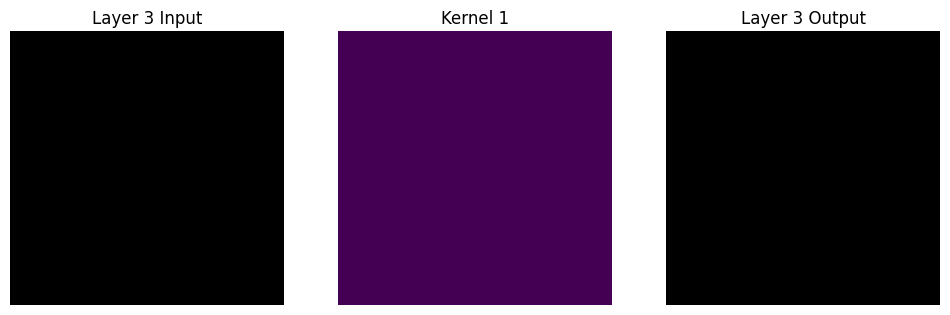

In [8]:
STRIDE = 4
writer = PillowWriter(fps=8)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax_in, ax_mul, ax_out = axes

ax_in.axis("off")
ax_mul.axis("off")
ax_out.axis("off")

with writer.saving(fig, "gifs/cnn_full_layer_reconstruction.gif", dpi=80):

    current = x.copy()


    for layer_idx, kernels in enumerate(kernels_per_layer, start=1):
        for k_idx, kernel in enumerate(kernels, start=1):

            H, W = current.shape
            k = kernel.shape[0]
            out = np.zeros((H-k+1, W-k+1))

            im_in = ax_in.imshow(current, cmap="gray")
            rect = plt.Rectangle((0, 0), k, k, edgecolor="red", fill=False)
            ax_in.add_patch(rect)

            ax_in.set_title(f"Layer {layer_idx} Input")

            im_mul = ax_mul.imshow(np.zeros((k,k)), cmap="viridis")
            ax_mul.set_title(f"Kernel {k_idx}")

            im_out = ax_out.imshow(out, cmap="gray")
            ax_out.set_title(f"Layer {layer_idx} Output")

            for i in range(0, H-k+1, STRIDE):
                for j in range(0, W-k+1, STRIDE):
                    patch = current[i:i+k, j:j+k]
                    val = np.sum(patch * kernel)

                    rect.set_xy((j, i))
                    im_mul.set_data(patch * kernel)

                    out[i, j] = val
                    im_out.set_data(out)

                    writer.grab_frame()

            rect.remove()
            current = relu(out)

        current = maxpool(current)


### Cell 6 — GRID + FAST GIF EXPORT